# Import libraries.

In [116]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

# Read Data

In [117]:
data = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')

In [118]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [119]:
data.shape

(200, 5)

# Statistics Info about the Data

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [121]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [122]:
data.isna().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [123]:
data.duplicated().any()

False

* The mean age of customers is equal to 38.85.
* The mean income of customers is equal to 60.56
* No Missing Values in Data.
* No Duplicate Values in Data.

# Exploratory Data Analysis (EDA)

In [124]:
data.drop('CustomerID' ,axis = 1, inplace=True)

In [125]:
data.rename(columns={'Genre':'Gender','Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'},inplace=True)

In [126]:
gender_count = data['Gender'].value_counts(normalize=True)
gender_count.to_frame()

,proportion
Gender,
Female,0.56
Male,0.44


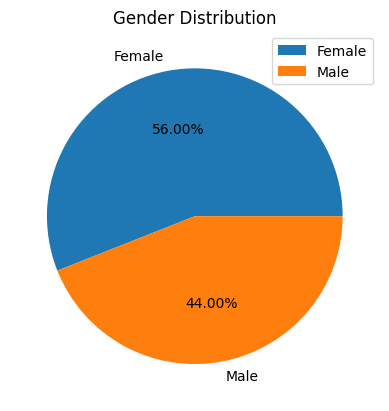

In [127]:
plt.pie(gender_count.values , autopct= '%.2f%%' ,labels= gender_count.index , )
plt.title("Gender Distribution")

plt.legend(loc='best')

In [128]:
data["Age"].describe().to_frame()

,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


# Transform Object Data

In [129]:
from sklearn.preprocessing import  LabelEncoder

label_encode = LabelEncoder()
data.Gender = label_encode.fit_transform(data.Gender)
data

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# Scalling

In [130]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age','Annual Income','Spending Score']] = scaler.fit_transform(data[['Age','Annual Income','Spending Score']])

data.head()

,Gender,Age,Annual Income,Spending Score
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


# Modelling

In [131]:

loss = []
cluster_num = []

for i in range(1,12):
 model_k_means = KMeans(n_clusters= i)
 cluster_num.append(i)
 model_k_means.fit(data)
 loss.append(model_k_means.inertia_)




/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 0, 'num of cluster')

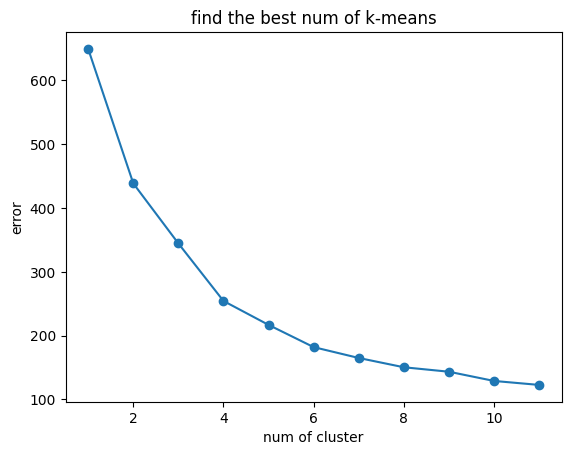

In [132]:

plt.plot(cluster_num , loss , marker = 'o')
plt.title('find the best num of k-means')
plt.ylabel('error')
plt.xlabel('num of cluster')

In [133]:

k_with_score = {}
for k in range(2,12):
    model_k_means = KMeans(n_clusters=k, random_state=45)
    model_k_means.fit(data)
    k_with_score[k] = silhouette_score(data, model_k_means.labels_)

   

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Score')

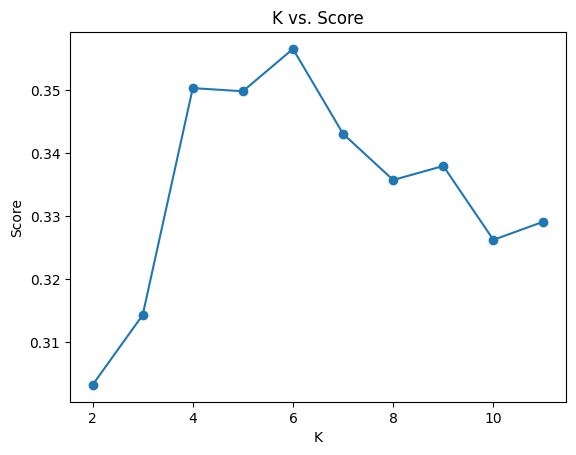

In [134]:
plt.plot(k_with_score.keys() , k_with_score.values(), marker = 'o')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')

* optimal according to elbow method that k=4
* optimal according to silhouete score is also =4

In [135]:
model_k_means = KMeans(n_clusters= 4 )
model_k_means.fit(data)
data['cluster'] = model_k_means.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [136]:
data.sample(5)

,Gender,Age,Annual Income,Spending Score,cluster
0,1,-1.424569,-1.738999,-0.434801,1
149,1,-0.348068,0.665675,1.545098,0
177,1,-0.850435,1.047369,0.729845,0
154,0,0.584899,0.665675,-1.327697,3
63,0,1.087265,-0.517577,0.341630,2


In [137]:
data['cluster'].unique()

array([1, 2, 3, 0], dtype=int32)

In [138]:
clutser0 = data[ data['cluster'] == 0]
clutser1 = data[ data['cluster'] == 1]
clutser2 = data[ data['cluster'] == 2]
clutser3 = data[ data['cluster'] == 3]

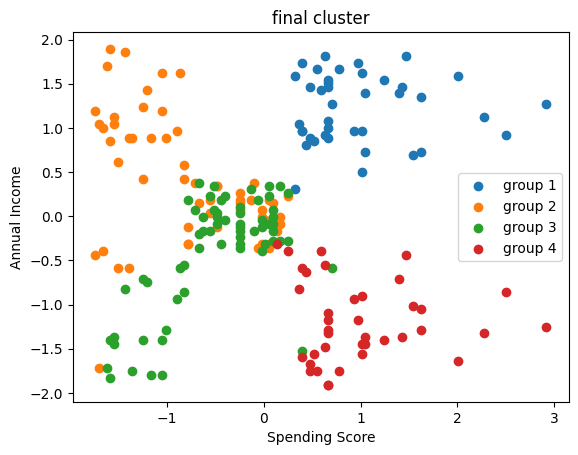

In [139]:

plt.scatter(clutser0['Annual Income'], clutser0['Spending Score'] ,label = 'group 1')
plt.scatter(clutser1['Annual Income'], clutser1['Spending Score'] ,label = 'group 2')
plt.scatter(clutser2['Annual Income'], clutser2['Spending Score'] ,label = 'group 3')
plt.scatter(clutser3['Annual Income'], clutser3['Spending Score'] ,label = 'group 4')

plt.title('final cluster')
plt.ylabel('Annual Income')
plt.xlabel('Spending Score')

plt.legend()
plt.show()



# Analysis

<Axes: ylabel='count'>

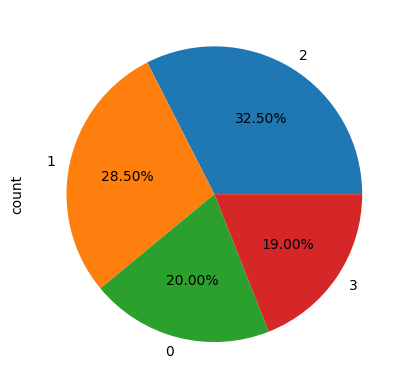

In [140]:
data['cluster'].value_counts().plot.pie(autopct= '%.2f%%')

<Axes: xlabel='cluster', ylabel='count'>

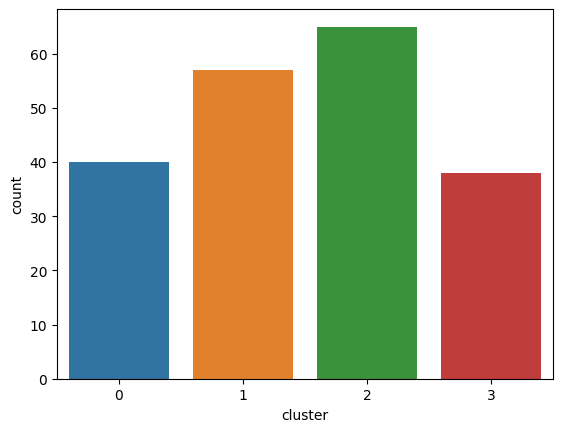

In [141]:
sns.countplot(data= data , x= 'cluster')

Text(0.5, 1.0, 'cluster spread ratio')

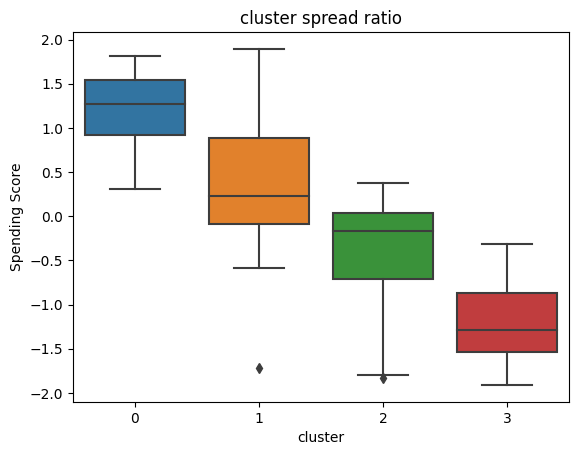

In [142]:
sns.boxplot(data = data , x='cluster' ,y = 'Spending Score' )
plt.title('cluster spread ratio')

<Axes: xlabel='cluster', ylabel='count'>

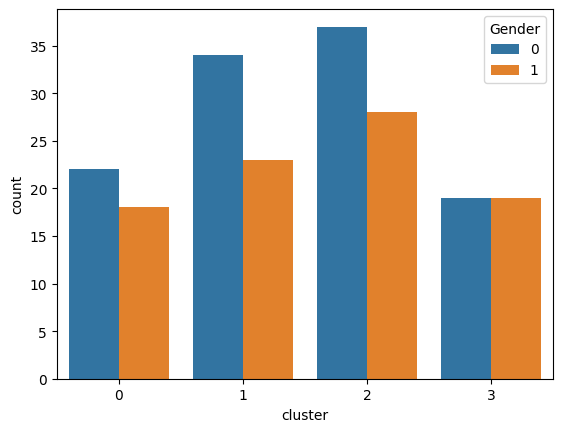

In [143]:
sns.countplot(data= data , x= 'cluster' , hue='Gender')